# 🐷 Susie Basic Timing and Ephemeris Object Usage

🔵 Import the necessary python libraries and Susie objects.

In [1]:
import numpy as np
import pandas as pd
from susie.timing_data import TimingData
from susie.ephemeris import Ephemeris

<hr style="color: #D64309;">
<hr style="color: #D64309;">

## &#128309; Basic Usage

The basic creation and usage of the **TimingData** and **Ephemeris** objects. This will assume the following:

1. Your data is in JD TDB timing format and system
2. You have both transit and occultation data
3. You have mid time uncertainties included in your data

We will pull this data from the repository below.

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

### 🔷 **STEP 1:** Download the example timing data <small>(includes transit and occultation data in Barycentric Julian Date)</small> from the GitHub repository

In [2]:
url = 'https://raw.githubusercontent.com/BoiseStatePlanetary/susie/main/example_data/wasp12b_tra_occ.csv'

# Read the CSV file directly from the URL
data = pd.read_csv(url)
tra_or_occs = np.array(data["tra_or_occ"])
epochs = np.array(data["epoch"].astype('int'))
mid_times = np.array(data["transit_time"])
mid_time_errs = np.array(data["sigma_transit_time"])

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

### 🔷 **STEP 2:** Add your transit and occultation data to the TimingData object.

In [3]:
# Create new transit times object with above data
timing_obj1 = TimingData('jd', epochs, mid_times, mid_time_uncertainties=mid_time_errs, tra_or_occ=tra_or_occs, time_scale='tdb')

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

### 🔷 **STEP 3:** Create the Ephemeris object and add your TimingData object.

In [4]:
ephemeris_obj1 = Ephemeris(timing_obj1)

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

### 🔷 **STEP 4:** Fit your transit time data to an ephemeris model. You can specify what type of model with the options 'linear' or 'quadratic'.

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔹 The **Linear** Model

In [5]:
# Getting a linear model will solve for period and conjuction time (and their respective errors)
linear_model_data = ephemeris_obj1.get_model_ephemeris('linear')

**🟢  EXAMPLE**

Calling `get_model_ephemeris` will return a dictionary of data. Below is an example of the dictionary returned for `linear_model_data`:

```
{'period': 1.0914196400440928,
 'period_err': 4.21033087274383e-08,
 'conjunction_time': 0.0023543850341696416,
 'conjunction_time_err': 9.256430832207615e-05,
 'model_type': 'linear',
 'model_data': array([2.35438503e-03, 2.53757421e+02, 2.58123099e+02...])}

```

In [6]:
# Uncomment this ↓↓↓↓ to see the real data!

# for key, value in linear_model_data.items():
#     print(f"{key}: {value}\n")

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔹 The **Quadratic** Model

We can do the same process for a quadratic model by specifying 'quadratic' for the model type instead of linear. The same process above is shown below for the quadratic model.

In [7]:
# Getting a quadratic model will solve for period, conjuction time, and period change per epoch (and their respective errors)
quadratic_model_data = ephemeris_obj1.get_model_ephemeris('quadratic')

**🟢  EXAMPLE**

Below is an example of the dictionary returned for `quadratic_model_data`:

```
{'period': 1.0914217244026556,
'period_err': 1.543206321797526e-07,
'conjunction_time': 0.0005511865218625013,
'conjunction_time_err': 0.00014528672879359023,
'period_change_by_epoch': -9.902087992310958e-10,
'period_change_by_epoch_err': 7.206633676288036e-11,
'model_type': 'quadratic',
'model_data': array([5.51186522e-04, 2.53756075e+02, 2.58121761e+02, 3.20878495e+02...])}
```

In [8]:
# Uncomment this ↓↓↓↓ to see the real data!

# for key, value in quadratic_model_data.items():
#     print(f"{key}: {value}\n")

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

### 🔷 **STEP 5:** Get BIC Values

We can get the BIC value for a specific model fit using the model data dictionaries returned from the `get_model_ephemeris` method.

In [9]:
linear_bic_value = ephemeris_obj1.calc_bic(linear_model_data)
quadratic_bic_value = ephemeris_obj1.calc_bic(quadratic_model_data)

print(f"Linear Model BIC: {linear_bic_value}\nQuadratic Model BIC: {quadratic_bic_value}")

Linear Model BIC: 386.7189919115902
Quadratic Model BIC: 184.9795030376433


And we can also get a $\Delta$ BIC value using the method `calc_delta_bic`. We do not need to input any data for this method. It will create the linear and quadratic models for you and calculate the BIC values for each model, then calculate the $\Delta$ BIC value. 

Keep in mind, it <span style="color: #4BA5DD;">**ONLY returns the $\Delta$ BIC value**</span> and not the other data calculated.

In [10]:
delta_bic_value = ephemeris_obj1.calc_delta_bic()

print(f"\u0394 BIC: {delta_bic_value}")

Δ BIC: 201.7394888739469


<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

### 🔷 **STEP 6:** Plot your data!

Now you can use the linear_model_data and quadratic_model_data dictionaries for plotting methods. Available plotting methods include:

* `plot_model_ephemeris`: This will plot the model predicted mid-times. This takes in a model data dictionary.
* `plot_timing_uncertainties`: This will plot the range of uncertainties for the model predicted mid-times. This takes in a model data dictionary.
* `plot_oc_plot`: This will plot the observed mid-times minus the model predicted mid-times (calculated with $x=E$, $y=T_0-PE$, $y_{\rm err}=\sigma T_0$) and a curve with the quadratic term ($x=E$, $y=0.5 \frac{dP}{dE} (E - {\rm median} (E))^2$). This **DOES NOT** take a model data dictionary.
* `plot_running_delta_bic`: This will plot how the $\Delta$ BIC value changes over time. This **DOES NOT** take a model data dictionary.

<!-- You can use the same process for a quadratic model ephemeris (shown below). -->

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔹 Plot the ephemeris

🔹 For the Linear Ephemeris

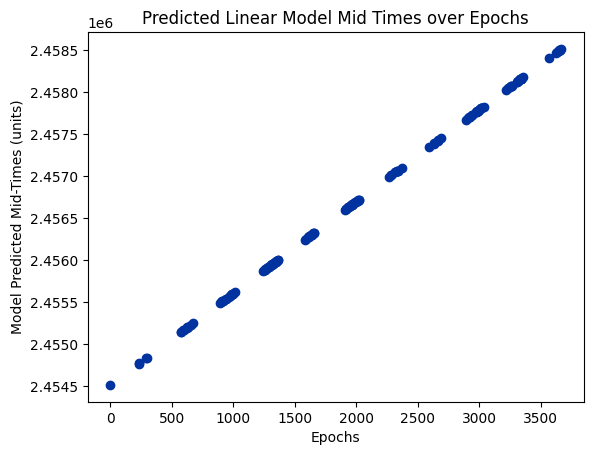

In [11]:
# Now we can plot this model
ephemeris_obj1.plot_model_ephemeris(linear_model_data, save_plot=False)

🔹 For the Quadratic Ephemeris

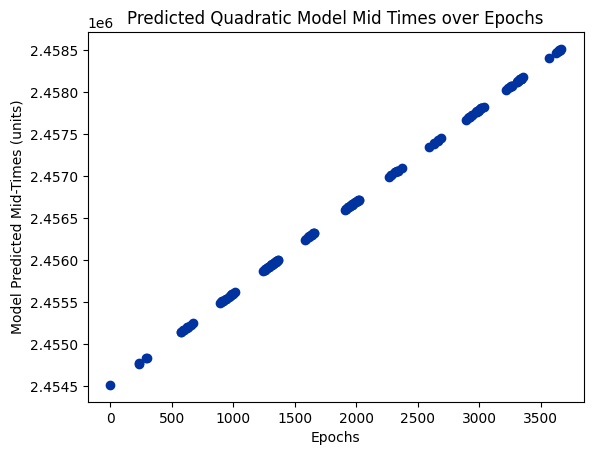

In [12]:
# Now we can plot this model
ephemeris_obj1.plot_model_ephemeris(quadratic_model_data, save_plot=False)

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔹 Plot the ephemeris uncertainties

🔹 For the Linear Ephemeris

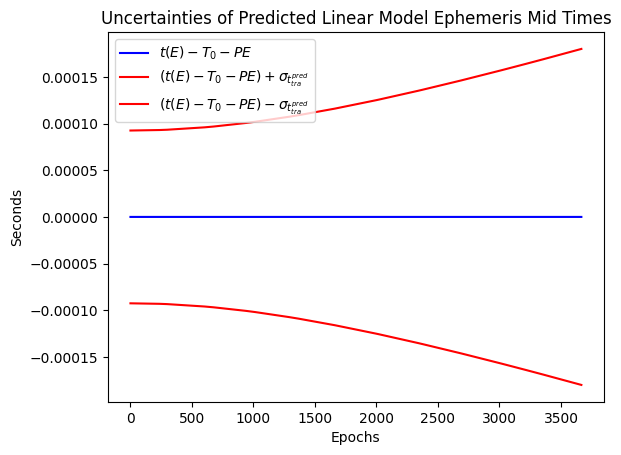

In [13]:
ephemeris_obj1.plot_timing_uncertainties(linear_model_data, save_plot=False)

🔹 For the Quadratic Ephemeris

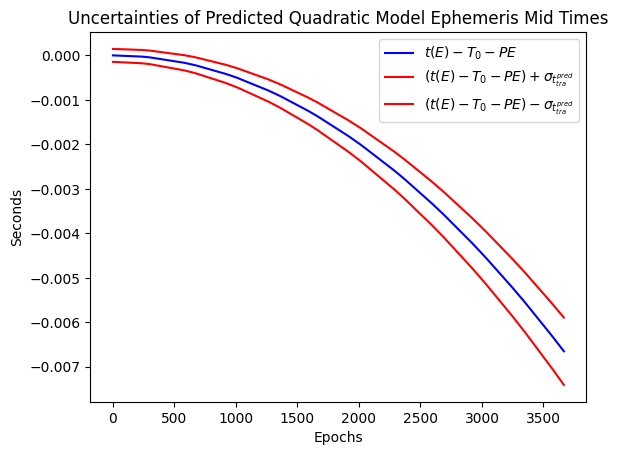

In [14]:
ephemeris_obj1.plot_timing_uncertainties(quadratic_model_data, save_plot=False)

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔹 The O-C Plot

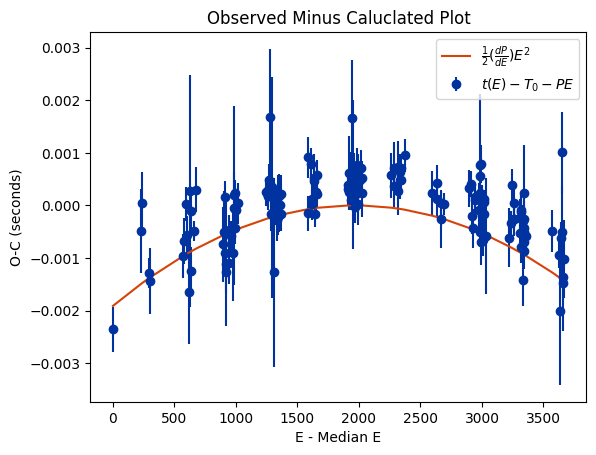

In [15]:
ephemeris_obj1.plot_oc_plot()

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔹 Plot the running $\Delta$ BIC

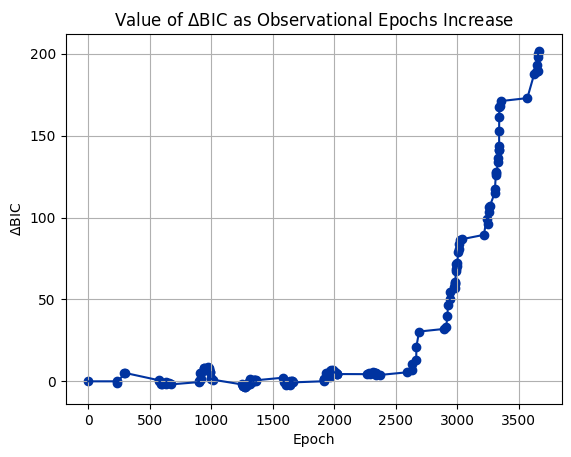

In [16]:
ephemeris_obj1.plot_running_delta_bic()

<hr style="color: #D64309;">
<hr style="color: #D64309;">